In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings("ignore")


In [20]:
indexdf = pd.read_csv('AI_index_db.csv')
indexdf

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,Traditional champions,High,Liberal democracy
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,Rising stars,High,Liberal democracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Sri Lanka,6.27,34.64,35.79,0.12,0.95,35.57,0.09,6.62,Asia-Pacific,Nascent,Lower middle,Electoral democracy
58,Egypt,1.11,38.84,0.00,2.08,1.54,68.72,0.31,4.83,Middle East,Nascent,Lower middle,Electoral autocracy
59,Kenya,0.75,14.11,29.84,0.07,12.15,7.75,0.31,2.30,Africa,Nascent,Lower middle,Electoral autocracy
60,Nigeria,2.74,0.00,50.10,0.45,2.06,7.75,0.33,1.38,Africa,Nascent,Lower middle,Electoral autocracy


In [4]:
indexdf.isnull().sum()

Country                  0
Talent                   0
Infrastructure           0
Operating Environment    0
Research                 0
Development              0
Government Strategy      0
Commercial               0
Total score              0
Region                   0
Cluster                  0
Income group             0
Political regime         0
dtype: int64

In [5]:
indexdf.columns

Index(['Country', 'Talent', 'Infrastructure', 'Operating Environment',
       'Research', 'Development', 'Government Strategy', 'Commercial',
       'Total score', 'Region', 'Cluster', 'Income group', 'Political regime'],
      dtype='object')

In [6]:
indexdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                62 non-null     object 
 1   Talent                 62 non-null     float64
 2   Infrastructure         62 non-null     float64
 3   Operating Environment  62 non-null     float64
 4   Research               62 non-null     float64
 5   Development            62 non-null     float64
 6   Government Strategy    62 non-null     float64
 7   Commercial             62 non-null     float64
 8   Total score            62 non-null     float64
 9   Region                 62 non-null     object 
 10  Cluster                62 non-null     object 
 11  Income group           62 non-null     object 
 12  Political regime       62 non-null     object 
dtypes: float64(8), object(5)
memory usage: 6.4+ KB


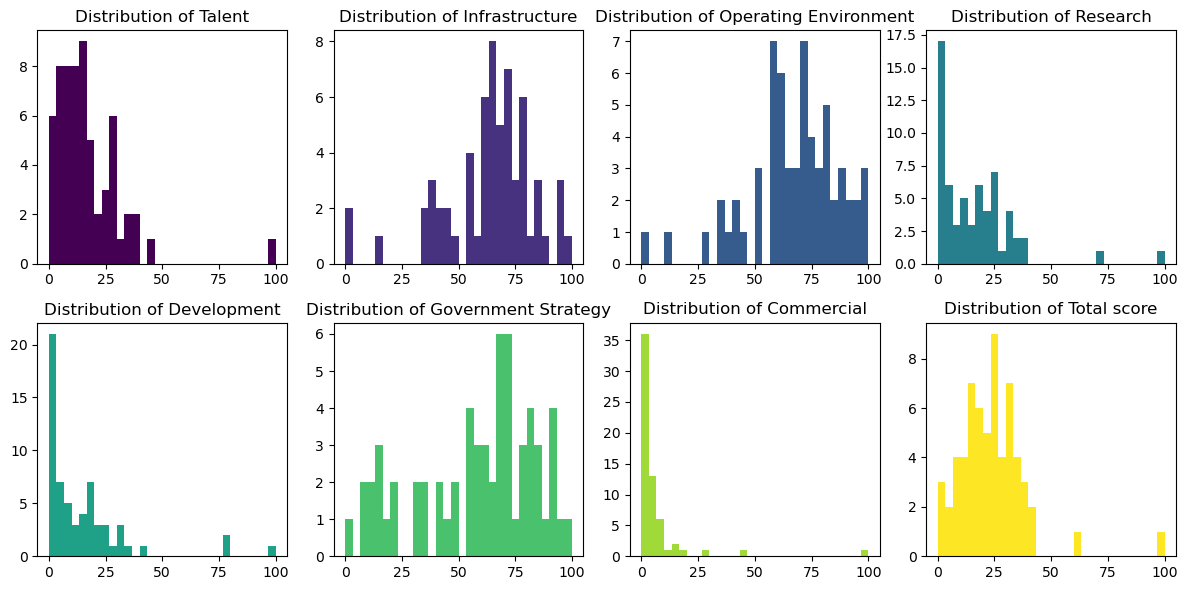

In [25]:
columns = ['Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development', 'Government Strategy', 'Commercial', 'Total score']

fig, axs = plt.subplots(2, 4, figsize=(12, 6))

axs = axs.ravel()

colors = cm.viridis(np.linspace(0, 1, len(columns)))

for i, col in enumerate(columns):
    axs[i].hist(indexdf[col], bins=30, color=colors[i])
    axs[i].set_title(f'Distribution of {col}')

plt.tight_layout()

plt.show()


<Axes: >

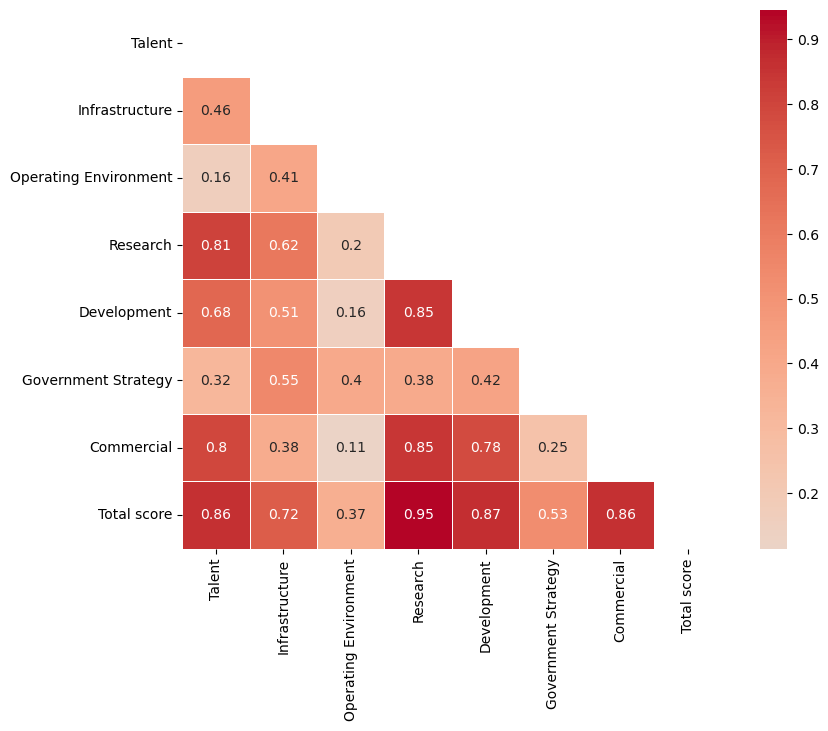

In [21]:
corr = indexdf.corr()

mask = np.triu(np.ones(corr.shape, dtype=bool))

fig, axs = plt.subplots(figsize=(10, 7))

sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0, annot=True,square=True, linewidths=.5)

Text(0.5, 1.0, 'Number of Countries Repot in Region')

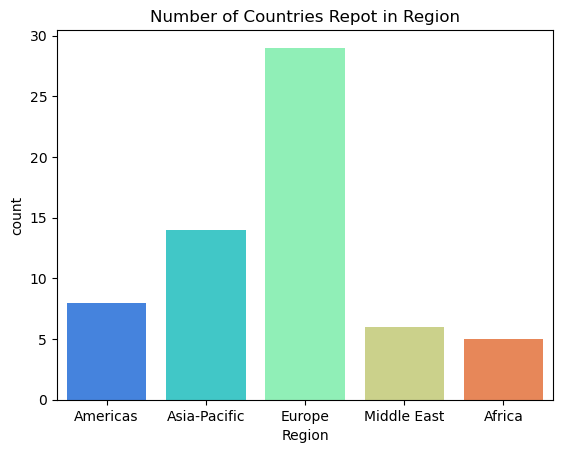

In [39]:
sns.countplot(x='Region', data= indexdf, palette='rainbow')
plt.title("Number of Countries Repot in Region")

<Figure size 1000x400 with 0 Axes>

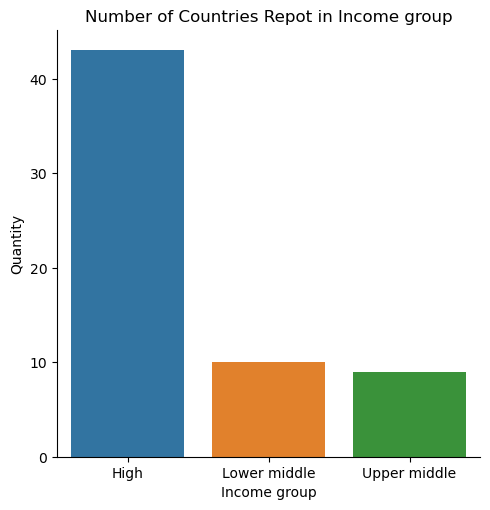

In [40]:
plt.figure(figsize=(10,4))

a = indexdf["Income group"].value_counts().reset_index()
a.columns =["Income group","Quantity"]

sns.catplot(x='Income group', y='Quantity', data=a, kind="bar")

plt.title("Number of Countries Repot in Income group")
plt.show()





Text(0.5, 1.0, 'Number of Countries Repot in Cluster')

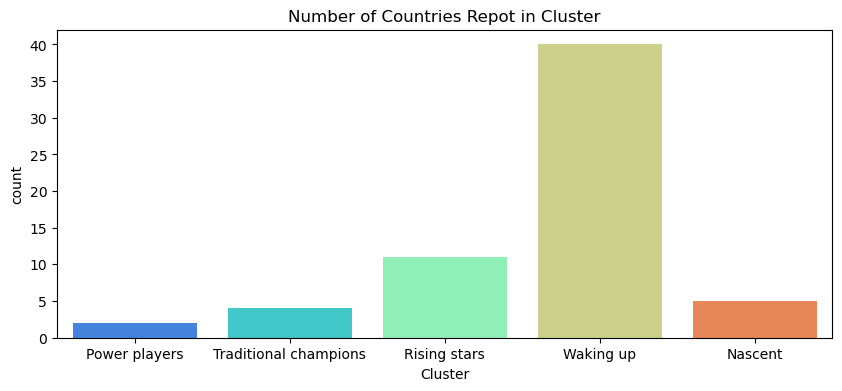

In [41]:
plt.figure(figsize=(10,4))
sns.countplot(x='Cluster', data=indexdf, palette='rainbow')

plt.title("Number of Countries Repot in Cluster")


Text(0.5, 1.0, 'Number of Countries Repot in Political regime')

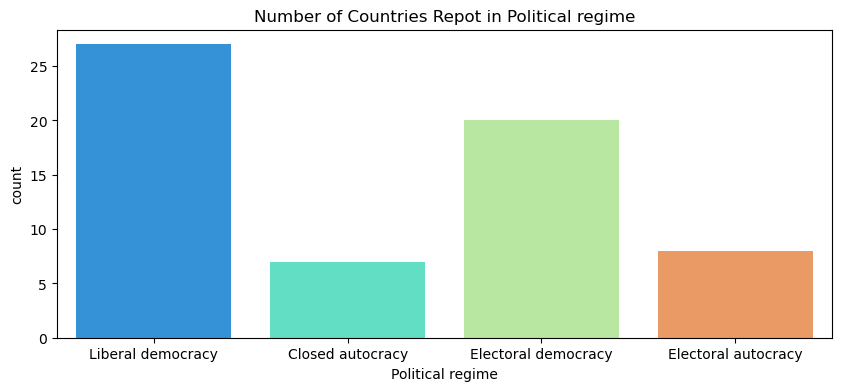

In [42]:
plt.figure(figsize=(10,4))
sns.countplot(x='Political regime', data=indexdf, palette='rainbow')
plt.title("Number of Countries Repot in Political regime")

Text(0.5, 1.0, 'Total score by Region')

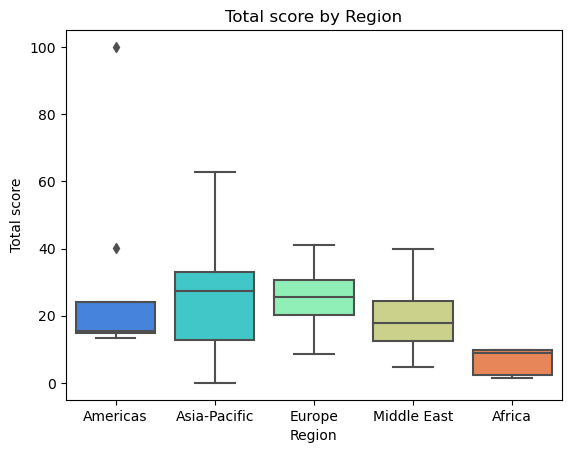

In [43]:
sns.boxplot(x='Region', y='Total score', data=indexdf, palette='rainbow')
plt.title("Total score by Region")

Text(0.5, 1.0, 'Total score by Clusters')

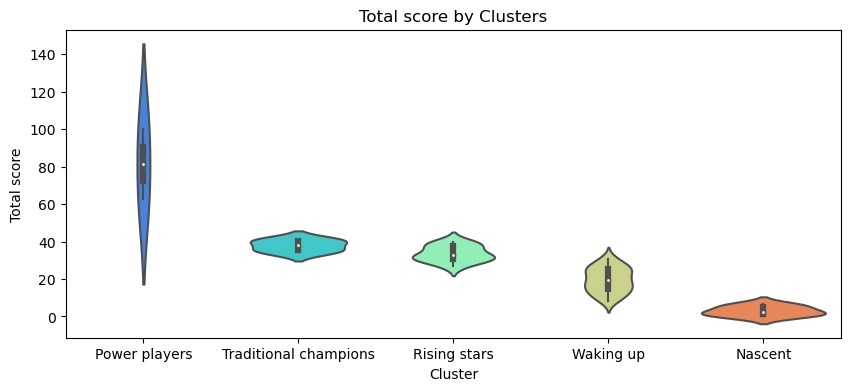

In [36]:
plt.figure(figsize=(10,4))

sns.violinplot(x='Cluster', y='Total score', data= indexdf, palette='rainbow')
plt.title("Total score by Clusters")

Text(0.5, 1.0, 'Total score by  Political regime and Income group')

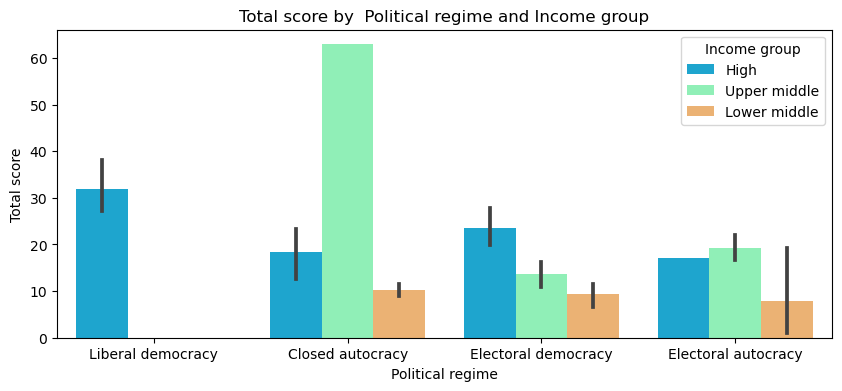

In [51]:
plt.figure(figsize=(10,4))

sns.barplot(x='Political regime', y='Total score', hue='Income group', data= indexdf, palette='rainbow')
plt.title("Total score by  Political regime and Income group")

Text(0.5, 1.0, 'Talent by  Region and Income group')

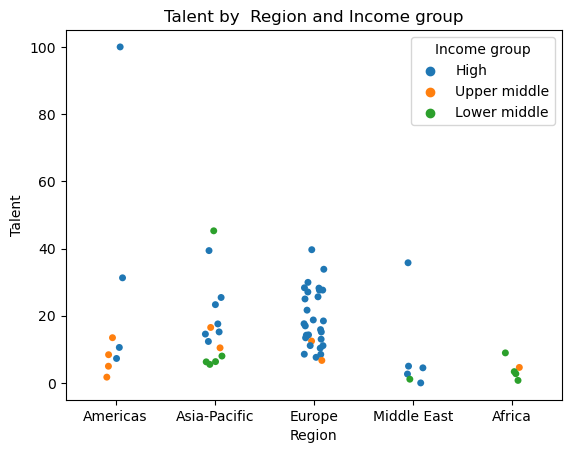

In [56]:
sns.stripplot(x='Region', y='Talent', hue='Income group', data=indexdf)

plt.title("Talent by  Region and Income group")

Text(0.5, 1.0, 'Talent by Cluster')

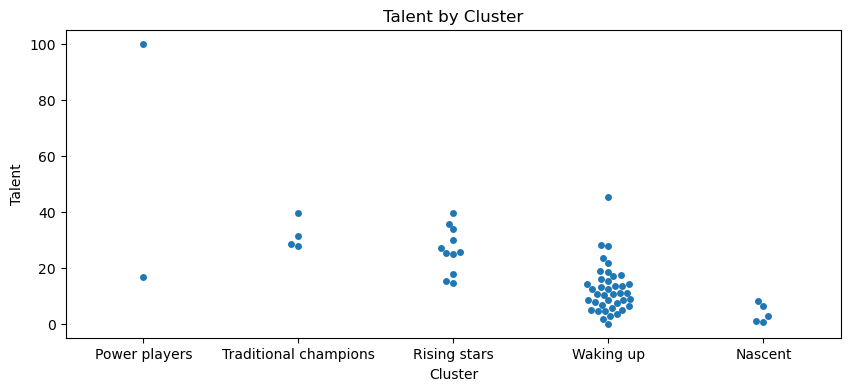

In [62]:
plt.figure(figsize=(10,4))

sns.swarmplot(x='Cluster', y='Talent', data=indexdf)

plt.title("Talent by Cluster")

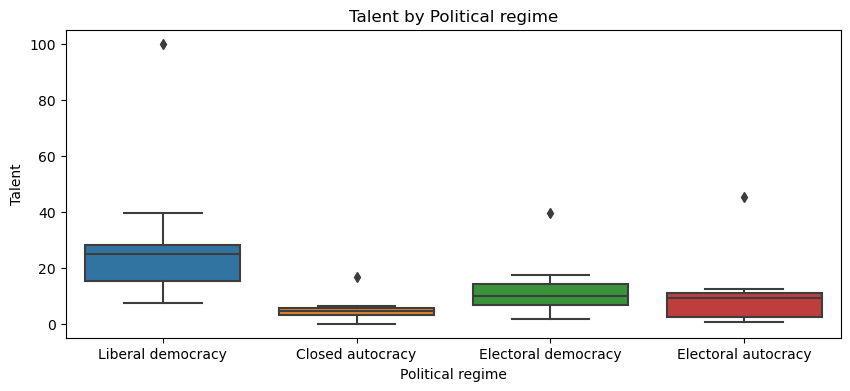

In [73]:
plt.figure(figsize=(10,4))

sns.boxplot( y='Talent', x='Political regime', data=indexdf)
plt.title("Talent by Political regime")

plt.show()